# Library Import and Data Loading

In [2]:
# import libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import cnn
from utils import calculate_f1_macro

2025-05-29 07:32:29.556845: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-29 07:32:30.355442: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-29 07:32:31.028475: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748478751.571509    5050 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748478751.720619    5050 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748478753.003182    5050 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
# load and preprocess data
(x_train, y_train), (x_val, y_val), (x_test, y_test), num_classes = cnn.load_and_preprocess_cifar10()

x_train shape: (40000, 32, 32, 3)
x_val shape: (10000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


# Hyperparameter Analysis

In [4]:
results = {}
best_f1 = -1
best_keras_cnn = None

analysis_epochs = 10


=== 1. Analisis Pengaruh Jumlah Layer Konvolusi ===

--- Training CNN: NumConvLayers_1 ---
Conv Layers: [(32, (3, 3))], Pooling: max, Global Pooling: False


2025-05-29 07:32:57.111315: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,050,890 (4.01 MB)

 Trainable params: 1,050,890 (4.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2025-05-29 07:32:57.775629: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.3417 - loss: 1.8357 - val_accuracy: 0.5119 - val_loss: 1.3799
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.5413 - loss: 1.3032 - val_accuracy: 0.5432 - val_loss: 1.2836
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.5811 - loss: 1.1857 - val_accuracy: 0.5842 - val_loss: 1.1836
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6235 - loss: 1.0725 - val_accuracy: 0.6038 - val_loss: 1.1334
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6514 - loss: 0.9995 - val_accuracy: 0.6133 - val_loss: 1.1140
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6692 - loss: 0.9350 - val_accuracy: 0.6334 - val_loss: 1.0600
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.6880 - loss: 0.8871 - val_accuracy: 0.6363 - val_loss: 1.0463
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7163 - loss: 0.8159 - val_accurac

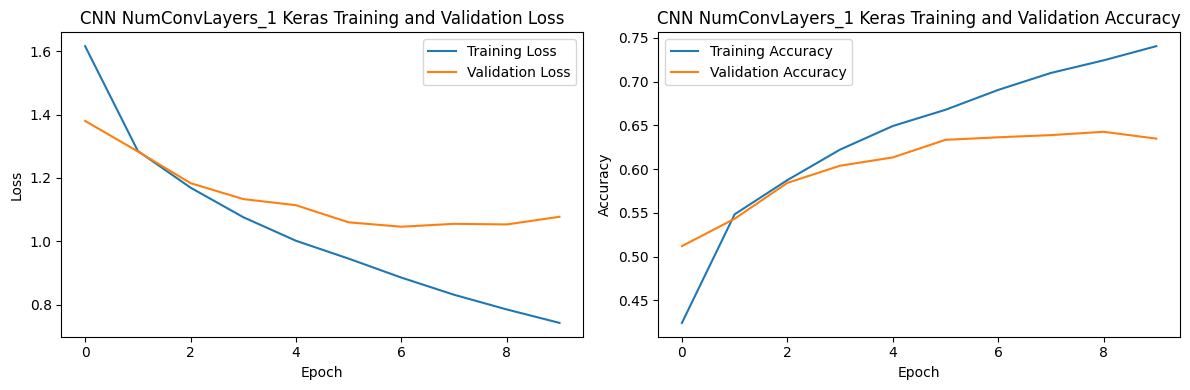

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Accuracy (Keras): 0.6319
Macro F1-Score (Keras): 0.6275

--- Training CNN: NumConvLayers_2 ---
Conv Layers: [(32, (3, 3)), (64, (3, 3))], Pooling: max, Global Pooling: False


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2025-05-29 07:35:04.759896: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.3679 - loss: 1.7410 - val_accuracy: 0.5826 - val_loss: 1.1931
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.5905 - loss: 1.1615 - val_accuracy: 0.6330 - val_loss: 1.0647
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.6544 - loss: 0.9778 - val_accuracy: 0.6675 - val_loss: 0.9637
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.6981 - loss: 0.8697 - val_accuracy: 0.6803 - val_loss: 0.9235
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.7335 - loss: 0.7729 - val_accuracy: 0.6976 - val_loss: 0.8859
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.7511 - loss: 0.7105 - val_accuracy: 0.6966 - val_loss: 0.8704
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.7815 - loss: 0.6292 - val_accuracy: 0.6939 - val_loss: 0.8894
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.8008 - loss: 0.5697 - val_accurac

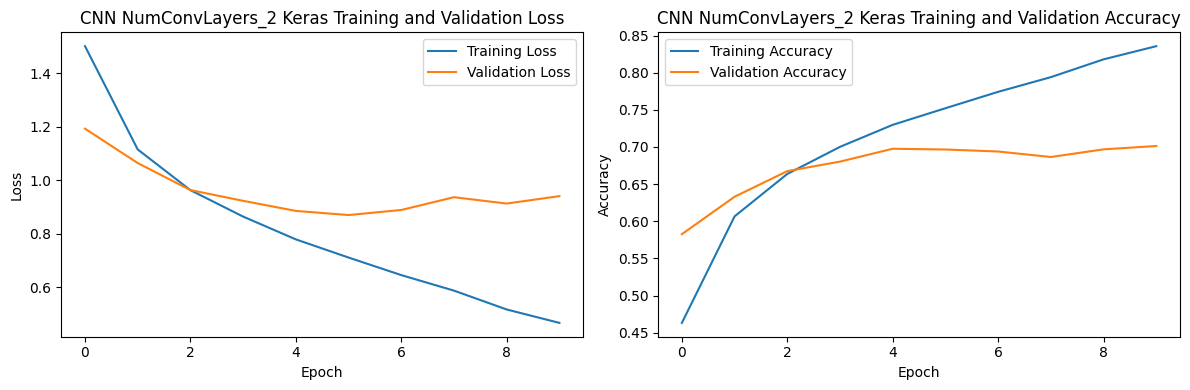

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Test Accuracy (Keras): 0.7022
Macro F1-Score (Keras): 0.7035

--- Training CNN: NumConvLayers_3 ---
Conv Layers: [(32, (3, 3)), (64, (3, 3)), (128, (3, 3))], Pooling: max, Global Pooling: False


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool3 (MaxPooling2D)         │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2025-05-29 07:38:06.274069: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.3550 - loss: 1.7484 - val_accuracy: 0.5591 - val_loss: 1.2354
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.5952 - loss: 1.1361 - val_accuracy: 0.6494 - val_loss: 1.0063
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.6805 - loss: 0.9162 - val_accuracy: 0.6818 - val_loss: 0.9084
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7321 - loss: 0.7743 - val_accuracy: 0.6930 - val_loss: 0.8844
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.7595 - loss: 0.6815 - val_accuracy: 0.7222 - val_loss: 0.8040
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7917 - loss: 0.6011 - val_accuracy: 0.7190 - val_loss: 0.8187
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.8163 - loss: 0.5276 - val_accuracy: 0.7361 - val_loss: 0.8034
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8401 - loss: 0.4605 - val_accurac

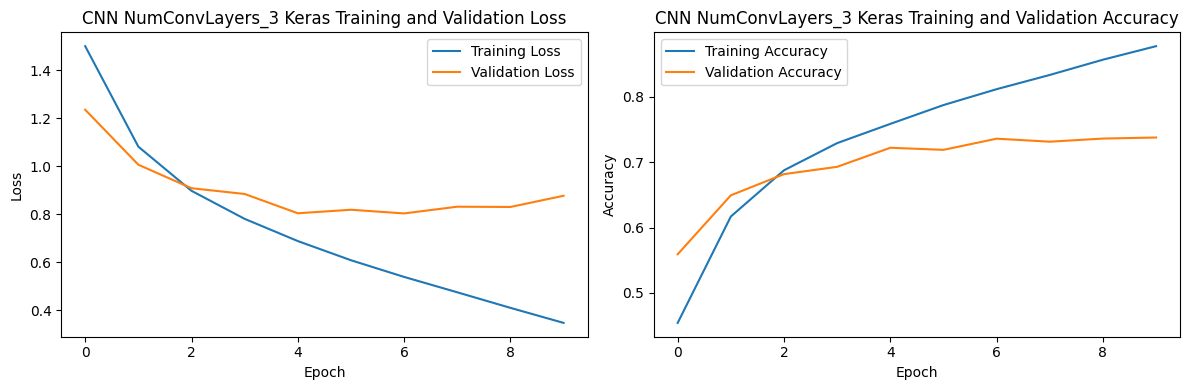

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Test Accuracy (Keras): 0.7417
Macro F1-Score (Keras): 0.7415


In [5]:
print("\n=== 1. Analisis Pengaruh Jumlah Layer Konvolusi ===")
num_conv_layer_variations = [
    [(32, (3,3))],                                  
    [(32, (3,3)), (64, (3,3))],                     
    [(32, (3,3)), (64, (3,3)), (128, (3,3))]
]
for i, config in enumerate(num_conv_layer_variations):
    desc = f"NumConvLayers_{i+1}"
    keras_model_variant, f1_score_keras, _ = cnn.train_and_evaluate_cnn_variant(
        x_train, y_train, x_val, y_val, x_test, y_test, num_classes,
        conv_layers_config=config, pooling_type='max', use_global_pooling=False,
        epochs=analysis_epochs, description=desc 
    )
    results[desc] = f1_score_keras
    if f1_score_keras > best_f1:
        best_f1 = f1_score_keras
        best_keras_cnn = keras_model_variant

Jumlah lapisan konvolusi mempengaruhi kemampuan model untuk mengekstraksi fitur secara hierarkis. Dari hasil, terlihat bahwa peningkatan jumlah lapisan konvolusi dari satu ke tiga lapisan meningkatkan F1-Score dari 0.6275 menjadi 0.7415. Hal ini menunjukkan bahwa model dengan lebih banyak lapisan dapat menangkap fitur yang lebih kompleks dan abstrak, karena setiap lapisan konvolusi berturut-turut memproses fitur dari lapisan sebelumnya, memungkinkan representasi yang lebih kaya. Satu lapisan konvolusi hanya menangkap fitur dasar (misalnya, tepi), sedangkan tiga lapisan memungkinkan model untuk mempelajari pola yang lebih kompleks (misalnya, bentuk atau objek). Namun, peningkatan jumlah lapisan juga meningkatkan kompleksitas komputasi dan risiko overfitting jika data pelatihan tidak cukup atau tanpa regularisasi yang memadai. Dalam kasus ini, model dengan tiga lapisan (NumConvLayers_3) memberikan performa terbaik, menunjukkan bahwa arsitektur yang lebih dalam lebih efektif untuk dataset yang digunakan (kemungkinan CIFAR-10, berdasarkan kode).


=== 2. Analisis Pengaruh Banyak Filter ===

--- Training CNN: NumFilters_1 ---
Conv Layers: [(16, (3, 3)), (32, (3, 3))], Pooling: max, Global Pooling: False


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 268,650 (1.02 MB)

 Trainable params: 268,650 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2025-05-29 07:41:52.231510: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.3550 - loss: 1.7704 - val_accuracy: 0.5590 - val_loss: 1.2614
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.5689 - loss: 1.2209 - val_accuracy: 0.5922 - val_loss: 1.1744
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6218 - loss: 1.0740 - val_accuracy: 0.6154 - val_loss: 1.1012
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6598 - loss: 0.9741 - val_accuracy: 0.6581 - val_loss: 0.9893
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6849 - loss: 0.8931 - val_accuracy: 0.6601 - val_loss: 0.9713
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7134 - loss: 0.8197 - val_accuracy: 0.6716 - val_loss: 0.9433
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7356 - loss: 0.7674 - val_accuracy: 0.6675 - val_loss: 0.9698
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7525 - loss: 0.7105 - val_accuracy: 0.

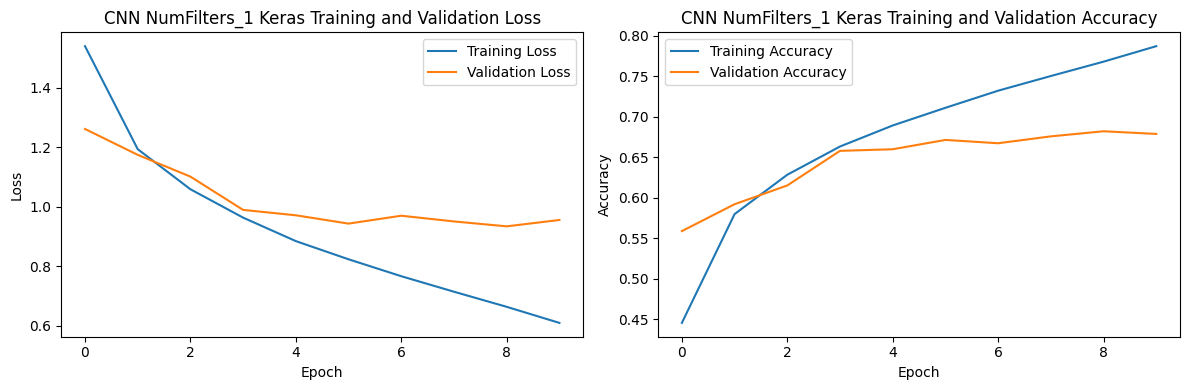

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Accuracy (Keras): 0.6763
Macro F1-Score (Keras): 0.6756

--- Training CNN: NumFilters_2 ---
Conv Layers: [(32, (3, 3)), (64, (3, 3))], Pooling: max, Global Pooling: False


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2025-05-29 07:43:31.276868: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.3739 - loss: 1.7246 - val_accuracy: 0.5493 - val_loss: 1.2753
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.5957 - loss: 1.1503 - val_accuracy: 0.6512 - val_loss: 1.0157
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.6655 - loss: 0.9566 - val_accuracy: 0.6593 - val_loss: 0.9792
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.7031 - loss: 0.8578 - val_accuracy: 0.6792 - val_loss: 0.9303
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.7288 - loss: 0.7791 - val_accuracy: 0.6809 - val_loss: 0.9501
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.7566 - loss: 0.6983 - val_accuracy: 0.6925 - val_loss: 0.8953
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.7790 - loss: 0.6300 - val_accuracy: 0.6895 - val_loss: 0.9175
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.8078 - loss: 0.5559 - val_accurac

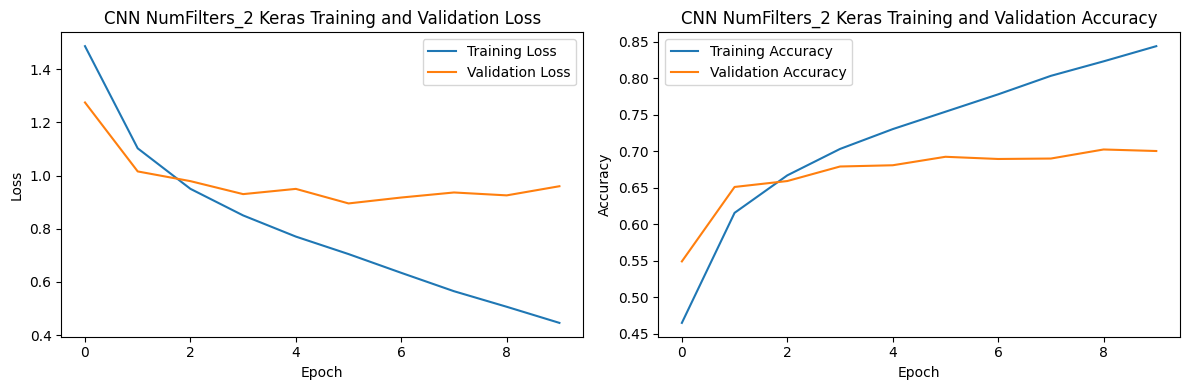

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test Accuracy (Keras): 0.7021
Macro F1-Score (Keras): 0.6998

--- Training CNN: NumFilters_3 ---
Conv Layers: [(64, (3, 3)), (128, (3, 3))], Pooling: max, Global Pooling: False


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125,642 (4.29 MB)

 Trainable params: 1,125,642 (4.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 66ms/step - accuracy: 0.3633 - loss: 1.7323 - val_accuracy: 0.5966 - val_loss: 1.1693
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.6148 - loss: 1.0948 - val_accuracy: 0.6357 - val_loss: 1.0461
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.6717 - loss: 0.9331 - val_accuracy: 0.6612 - val_loss: 0.9632
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 94ms/step - accuracy: 0.7164 - loss: 0.8128 - val_accuracy: 0.6979 - val_loss: 0.8930
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 97ms/step - accuracy: 0.7519 - loss: 0.7227 - val_accuracy: 0.7090 - val_loss: 0.8520
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 101ms/step - accuracy: 0.7800 - loss: 0.6370 - val_accuracy: 0.7087 - val_loss: 0.8602
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.8104 - loss: 0.5513 - val_accuracy: 0.7100 - val_loss: 0.8745
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 109ms/step - accuracy: 0.8276 - loss: 0.4944

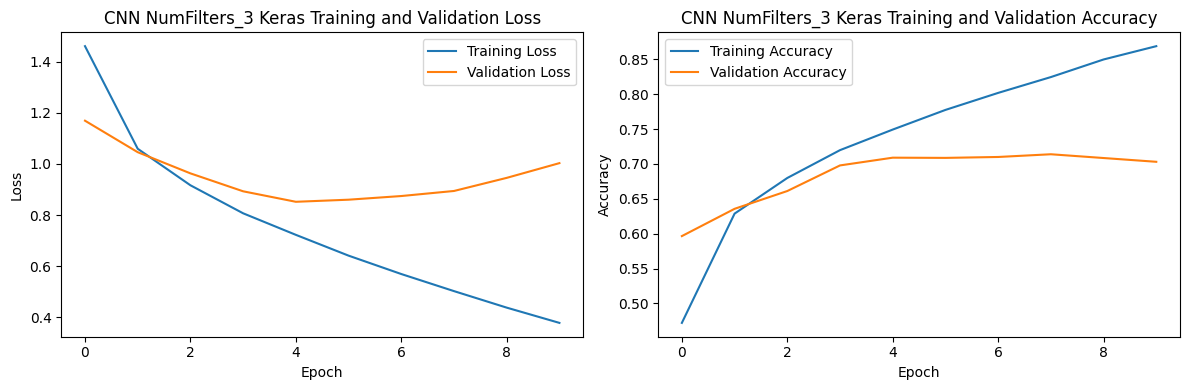

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
Test Accuracy (Keras): 0.7056
Macro F1-Score (Keras): 0.7033


In [6]:
print("\n=== 2. Analisis Pengaruh Banyak Filter ===")
filter_variations = [
    [(16, (3,3)), (32, (3,3))], 
    [(32, (3,3)), (64, (3,3))], 
    [(64, (3,3)), (128, (3,3))] 
]
for i, config in enumerate(filter_variations):
    desc = f"NumFilters_{i+1}"
    keras_model_variant, f1_score_keras, _ = cnn.train_and_evaluate_cnn_variant(
        x_train, y_train, x_val, y_val, x_test, y_test, num_classes,
        conv_layers_config=config, pooling_type='max', use_global_pooling=False,
        epochs=analysis_epochs, description=desc
    )
    results[desc] = f1_score_keras
    if f1_score_keras > best_f1: 
        best_f1 = f1_score_keras
        best_keras_cnn = keras_model_variant


Jumlah filter pada setiap lapisan konvolusi menentukan jumlah fitur yang dapat diekstraksi. Hasil menunjukkan bahwa peningkatan jumlah filter dari (16, 32) ke (32, 64) meningkatkan F1-Score dari 0.6756 ke 0.6998, menunjukkan bahwa lebih banyak filter memungkinkan model untuk menangkap lebih banyak pola yang berbeda, sehingga meningkatkan kemampuan diskriminatifnya. Namun, peningkatan lebih lanjut ke (64, 128) hanya memberikan peningkatan kecil (0.7033), yang menunjukkan adanya efek diminishing returns. Dengan lebih banyak filter, model memiliki kapasitas lebih besar, tetapi juga meningkatkan kompleksitas dan risiko overfitting, terutama jika dataset tidak cukup besar untuk mendukung parameter tambahan. Dalam hal ini, konfigurasi (64, 128) memberikan performa terbaik, tetapi keuntungannya relatif kecil dibandingkan (32, 64), menunjukkan bahwa jumlah filter yang moderat (32, 64) mungkin sudah cukup untuk menangkap fitur penting pada dataset ini.


=== 3. Analisis Pengaruh Ukuran Filter ===

--- Training CNN: KernelSize_1 ---
Conv Layers: [(32, (2, 2)), (64, (2, 2))], Pooling: max, Global Pooling: False


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 534,378 (2.04 MB)

 Trainable params: 534,378 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.3638 - loss: 1.7596 - val_accuracy: 0.5447 - val_loss: 1.2725
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.5545 - loss: 1.2465 - val_accuracy: 0.5991 - val_loss: 1.1530
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.6143 - loss: 1.0872 - val_accuracy: 0.6092 - val_loss: 1.1075
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.6515 - loss: 0.9928 - val_accuracy: 0.6369 - val_loss: 1.0424
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.6790 - loss: 0.9151 - val_accuracy: 0.6540 - val_loss: 0.9908
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.7036 - loss: 0.8485 - val_accuracy: 0.6561 - val_loss: 0.9948
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.7203 - loss: 0.8041 - val_accuracy: 0.6749 - val_loss: 0.9324
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.7396 - loss: 0.7359 - 

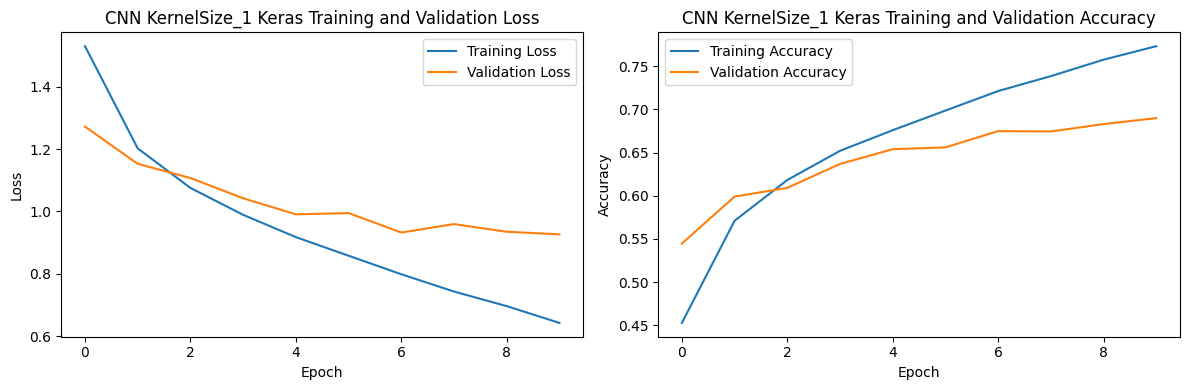

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Test Accuracy (Keras): 0.6946
Macro F1-Score (Keras): 0.6930

--- Training CNN: KernelSize_2 ---
Conv Layers: [(32, (3, 3)), (64, (3, 3))], Pooling: max, Global Pooling: False


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - accuracy: 0.3854 - loss: 1.6988 - val_accuracy: 0.5650 - val_loss: 1.2612
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6082 - loss: 1.1136 - val_accuracy: 0.6554 - val_loss: 1.0072
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6696 - loss: 0.9415 - val_accuracy: 0.6716 - val_loss: 0.9581
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7081 - loss: 0.8334 - val_accuracy: 0.6797 - val_loss: 0.9237
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.7387 - loss: 0.7461 - val_accuracy: 0.6820 - val_loss: 0.9396
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.7636 - loss: 0.6712 - val_accuracy: 0.6945 - val_loss: 0.8912
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.7925 - loss: 0.5984 - val_accuracy: 0.6948 - val_loss: 0.9119
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8182 - loss: 0.5218 - 

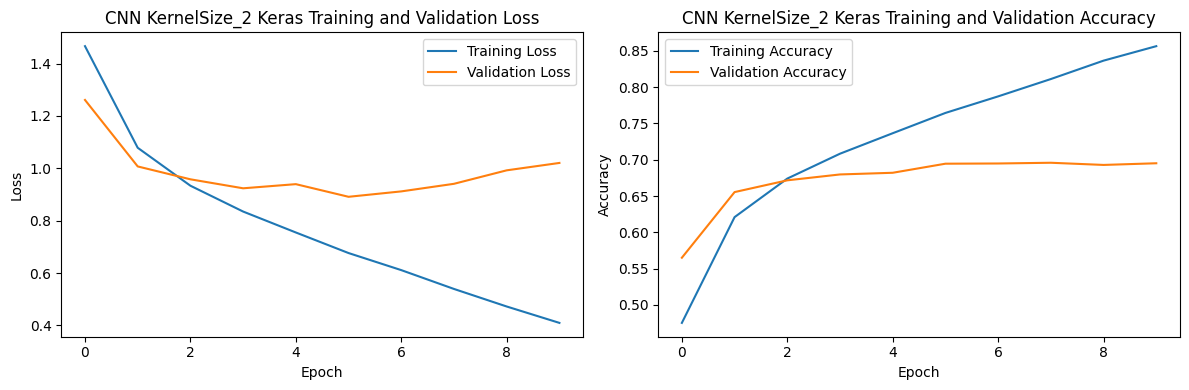

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test Accuracy (Keras): 0.6986
Macro F1-Score (Keras): 0.6964

--- Training CNN: KernelSize_3 ---
Conv Layers: [(32, (5, 5)), (64, (5, 5))], Pooling: max, Global Pooling: False


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 579,402 (2.21 MB)

 Trainable params: 579,402 (2.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.3573 - loss: 1.7451 - val_accuracy: 0.5623 - val_loss: 1.2348
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.5836 - loss: 1.1682 - val_accuracy: 0.6285 - val_loss: 1.0631
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.6571 - loss: 0.9703 - val_accuracy: 0.6437 - val_loss: 1.0285
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.7038 - loss: 0.8436 - val_accuracy: 0.6863 - val_loss: 0.9023
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.7435 - loss: 0.7420 - val_accuracy: 0.6891 - val_loss: 0.9110
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.7721 - loss: 0.6495 - val_accuracy: 0.6791 - val_loss: 0.9552
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.7999 - loss: 0.5761 - val_accuracy: 0.6932 - val_loss: 0.9100
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.8242 - loss: 0.5057 - 

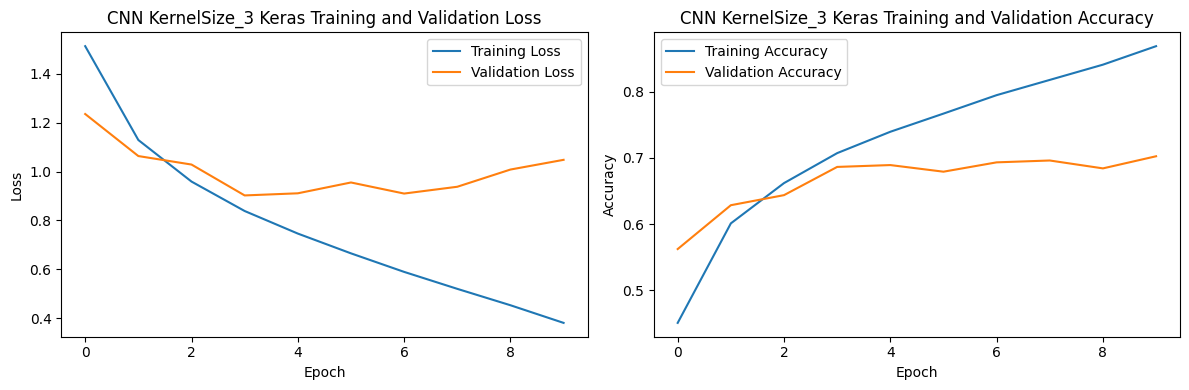

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Test Accuracy (Keras): 0.7017
Macro F1-Score (Keras): 0.7011


In [7]:
print("\n=== 3. Analisis Pengaruh Ukuran Filter ===")
kernel_size_variations = [
    [(32, (2,2)), (64, (2,2))], 
    [(32, (3,3)), (64, (3,3))], 
    [(32, (5,5)), (64, (5,5))]  
]
for i, config in enumerate(kernel_size_variations):
    desc = f"KernelSize_{i+1}"
    keras_model_variant, f1_score_keras, _ = cnn.train_and_evaluate_cnn_variant(
        x_train, y_train, x_val, y_val, x_test, y_test, num_classes,
        conv_layers_config=config, pooling_type='max', use_global_pooling=False,
        epochs=analysis_epochs, description=desc
    )
    results[desc] = f1_score_keras
    if f1_score_keras > best_f1: 
        best_f1 = f1_score_keras
        best_keras_cnn = keras_model_variant

Ukuran filter mempengaruhi jenis fitur yang dapat dideteksi oleh lapisan konvolusi. Filter yang lebih kecil (misalnya, 2x2) fokus pada detail lokal, sedangkan filter yang lebih besar (misalnya, 5x5) dapat menangkap fitur yang lebih global. Hasil menunjukkan bahwa ukuran filter 5x5 (KernelSize_3) memberikan F1-Score tertinggi (0.7011), diikuti oleh 3x3 (0.6964) dan 2x2 (0.6930). Peningkatan performa dari 2x2 ke 5x5 menunjukkan bahwa filter yang lebih besar mungkin lebih efektif untuk dataset ini, kemungkinan karena dapat menangkap pola yang lebih luas atau kontekstual (misalnya, bentuk atau struktur objek yang lebih besar pada gambar CIFAR-10). Namun, perbedaan F1-Score relatif kecil, menunjukkan bahwa ukuran filter 3x3 sudah cukup kompetitif dan sering digunakan sebagai standar karena keseimbangan antara menangkap detail dan konteks tanpa meningkatkan kompleksitas komputasi secara berlebihan. Filter 5x5 memberikan hasil terbaik, tetapi keuntungannya kecil dibandingkan 3x3, sehingga ukuran 3x3 mungkin lebih praktis untuk efisiensi komputasi.


=== 4. Analisis Pengaruh Jenis Pooling Layer ===

--- Training CNN: PoolingType_max ---
Conv Layers: [(32, (3, 3)), (64, (3, 3))], Pooling: max, Global Pooling: False


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2 (MaxPooling2D)         │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.3723 - loss: 1.7346 - val_accuracy: 0.5572 - val_loss: 1.2334
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.5949 - loss: 1.1591 - val_accuracy: 0.6317 - val_loss: 1.0634
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.6515 - loss: 0.9987 - val_accuracy: 0.6470 - val_loss: 1.0189
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.6939 - loss: 0.8792 - val_accuracy: 0.6802 - val_loss: 0.9347
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.7253 - loss: 0.7874 - val_accuracy: 0.6764 - val_loss: 0.9326
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.7474 - loss: 0.7208 - val_accuracy: 0.6925 - val_loss: 0.8989
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.7773 - loss: 0.6435 - val_accuracy: 0.6956 - val_loss: 0.9071
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.7970 - loss: 0.5878 - 

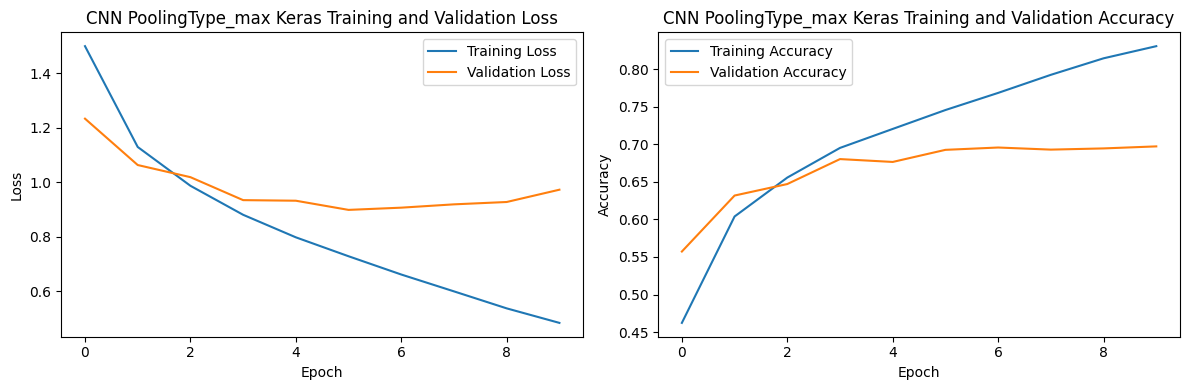

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Test Accuracy (Keras): 0.6946
Macro F1-Score (Keras): 0.6959

--- Training CNN: PoolingType_avg ---
Conv Layers: [(32, (3, 3)), (64, (3, 3))], Pooling: avg, Global Pooling: False


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ avgpool1 (AveragePooling2D)     │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ avgpool2 (AveragePooling2D)     │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.3623 - loss: 1.7482 - val_accuracy: 0.5385 - val_loss: 1.3029
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.5563 - loss: 1.2517 - val_accuracy: 0.5996 - val_loss: 1.1572
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6119 - loss: 1.0971 - val_accuracy: 0.6258 - val_loss: 1.0787
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6505 - loss: 0.9892 - val_accuracy: 0.6480 - val_loss: 1.0113
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6860 - loss: 0.8945 - val_accuracy: 0.6552 - val_loss: 1.0003
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7161 - loss: 0.8158 - val_accuracy: 0.6691 - val_loss: 0.9706
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7418 - loss: 0.7487 - val_accuracy: 0.6876 - val_loss: 0.9091
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.7636 - loss: 0.6796 - 

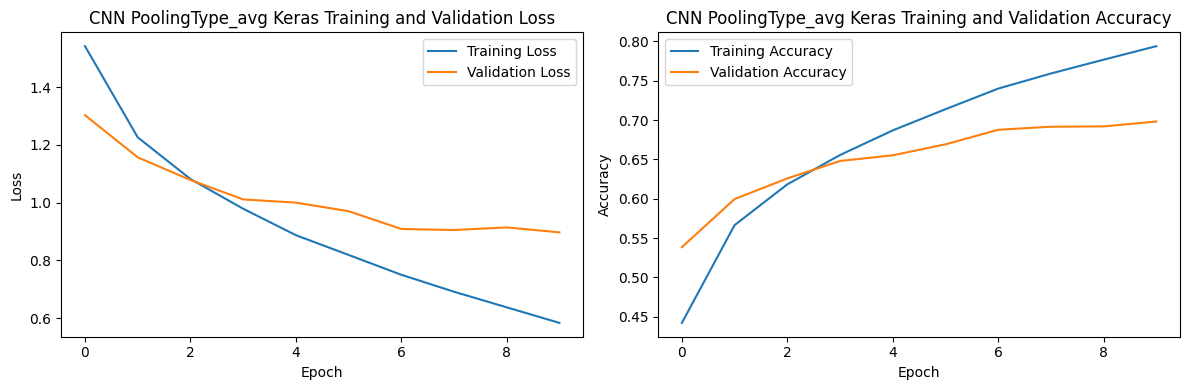

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test Accuracy (Keras): 0.7031
Macro F1-Score (Keras): 0.7040


In [8]:
print("\n=== 4. Analisis Pengaruh Jenis Pooling Layer ===")
pooling_variations = ['max', 'avg']
base_conv_config = [(32, (3,3)), (64, (3,3))] 
for pool_type in pooling_variations:
    desc = f"PoolingType_{pool_type}"
    keras_model_variant, f1_score_keras, _ = cnn.train_and_evaluate_cnn_variant(
        x_train, y_train, x_val, y_val, x_test, y_test, num_classes,
        conv_layers_config=base_conv_config, pooling_type=pool_type, use_global_pooling=False,
        epochs=analysis_epochs, description=desc
    )
    results[desc] = f1_score_keras
    if f1_score_keras > best_f1: 
        best_f1 = f1_score_keras
        best_keras_cnn = keras_model_variant

Jenis pooling layer (max pooling atau average pooling) memengaruhi bagaimana informasi spasial diringkas setelah operasi konvolusi. Max pooling mengambil nilai maksimum dari setiap jendela pooling, menonjolkan fitur yang paling dominan, sedangkan average pooling menghitung rata-rata, memberikan representasi yang lebih halus. Hasil menunjukkan bahwa average pooling (0.7040) sedikit lebih baik daripada max pooling (0.6959) dalam hal F1-Score. Ini menunjukkan bahwa untuk dataset yang digunakan, average pooling mungkin lebih efektif dalam mempertahankan informasi konteks yang lebih luas, yang dapat membantu dalam tugas klasifikasi dengan fitur yang tidak selalu bergantung pada nilai ekstrem. Max pooling cenderung lebih agresif dalam memilih fitur dominan, yang bisa mengabaikan informasi subtil, sedangkan average pooling lebih inklusif terhadap kontribusi semua piksel dalam jendela. Keunggulan average pooling dalam kasus ini menunjukkan bahwa dataset mungkin memiliki fitur yang lebih terdistribusi secara merata, dan average pooling membantu model menangkap representasi yang lebih stabil.

In [9]:
print("\n--- Ringkasan F1 Scores CNN Variants (Keras Model) ---")
for desc, f1_val in results.items():
    print(f"{desc}: {f1_val:.4f}")
best_keras_cnn.save("best_keras_cnn.keras")


--- Ringkasan F1 Scores CNN Variants (Keras Model) ---
NumConvLayers_1: 0.6275
NumConvLayers_2: 0.7035
NumConvLayers_3: 0.7415
NumFilters_1: 0.6756
NumFilters_2: 0.6998
NumFilters_3: 0.7033
KernelSize_1: 0.6930
KernelSize_2: 0.6964
KernelSize_3: 0.7011
PoolingType_max: 0.6959
PoolingType_avg: 0.7040


# Keras vs Manual CNN Model

In [10]:
cnn_manual = cnn.CNNFromScratch()
cnn_manual.load_keras_model(best_keras_cnn)

Processing Keras layer: conv1 of type <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
Added separate activation relu after conv1
Processing Keras layer: maxpool1 of type <class 'keras.src.layers.pooling.max_pooling2d.MaxPooling2D'>
Processing Keras layer: conv2 of type <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
Added separate activation relu after conv2
Processing Keras layer: maxpool2 of type <class 'keras.src.layers.pooling.max_pooling2d.MaxPooling2D'>
Processing Keras layer: conv3 of type <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
Added separate activation relu after conv3
Processing Keras layer: maxpool3 of type <class 'keras.src.layers.pooling.max_pooling2d.MaxPooling2D'>
Processing Keras layer: flatten of type <class 'keras.src.layers.reshaping.flatten.Flatten'>
Processing Keras layer: dense1 of type <class 'keras.src.layers.core.dense.Dense'>
Processing Keras layer: output_dense of type <class 'keras.src.layers.core.dense.Dense'>


2025-05-29 12:44:19.770815: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
print(f"\nPredicting with Keras CNN on {x_test.shape[0]} samples...")
y_pred_keras_cnn_proba = best_keras_cnn.predict(x_test)

print(f"Predicting with Manual CNN on {x_test.shape[0]} samples...")
y_pred_manual_cnn_proba = cnn_manual.predict(x_test)
                                                                                         
print(f"Keras CNN output shape: {y_pred_keras_cnn_proba.shape}")
print(f"Manual CNN output shape: {y_pred_manual_cnn_proba.shape}")
                                                                                         
f1_keras_cnn = calculate_f1_macro(y_test, y_pred_keras_cnn_proba, num_classes)
f1_manual_cnn = calculate_f1_macro(y_test, y_pred_manual_cnn_proba, num_classes)
                                                                                         
print(f"\nMacro F1-Score (Keras CNN): {f1_keras_cnn:.4f}")
print(f"Macro F1-Score (Manual CNN): {f1_manual_cnn:.4f}")


Predicting with Keras CNN on 10000 samples...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Predicting with Manual CNN on 10000 samples...
Keras CNN output shape: (10000, 10)
Manual CNN output shape: (10000, 10)

Macro F1-Score (Keras CNN): 0.7415
Macro F1-Score (Manual CNN): 0.7415
